In [3]:
import pandas as pd
import numpy as np


In [4]:
ss=pd.read_csv('survey_results_public.csv')
ss.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
import seaborn as sns
from statistics import mean
#a. Find the average age of developers when they wrote their first line of code
#finding average of 1st code
data={'ages':ss['Age1stCode']}
df=pd.DataFrame(data)
df['ages'] = pd.to_numeric(df['ages'],errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['ages'] = df['ages'].astype(int)

average=mean(df['ages'])
average
    

15.144302060011476

In [6]:
#b. Deduce the percentage of developers who know python in each country.
ki=list(set(ss['Country']))
from collections import Counter
ps=dict(Counter(ss['Country']))
#print(ps)
mk=list(ps.values())
#print(ps)

usa={}
salr={}
for i in ki:
    usa[i]=0
    salr[i]=0
c=0
#print(usa)
for i in ss['LanguageWorkedWith']:
    if 'Python' in str(i):
        y=ss['Country'][c]
        usa[str(y)]+=1

    
    c+=1
df1={'Country':list(usa.keys()),'Count':list(usa.values())}
dff={'Country':list(ps.keys()),'totalCo':mk}
df2=pd.DataFrame(dff,columns=['Country','totalCo'])

df3 = pd.DataFrame(df1,columns=['Country','Count'])
cv=pd.merge(df2,df3)
cv['percentage'] = cv['Count']/cv['totalCo']
print(cv)






                              Country  totalCo  Count  percentage
0                      United Kingdom     5737   2384    0.415548
1              Bosnia and Herzegovina      108     29    0.268519
2                            Thailand      214     92    0.429907
3                       United States    20949  10083    0.481312
4                             Ukraine      868    246    0.283410
..                                ...      ...    ...         ...
175  Saint Vincent and the Grenadines        1      0    0.000000
176                        San Marino        2      1    0.500000
177             Sao Tome and Principe        1      1    1.000000
178                              Chad        1      0    0.000000
179                               NaN      132      0    0.000000

[180 rows x 4 columns]


In [7]:
#c. Generate a report for the average salary of developer based on continent.
dat={'salry':ss['CompTotal']}
df4=pd.DataFrame(dat)
df4['salry'] = pd.to_numeric(df4['salry'],errors='coerce')
df4 = df4.replace(np.nan, 0, regex=True)
df4['salry'] = df4['salry'].astype(int)
l=list(df4['salry'])
c=0

for i in ss['Country']:
    if i in ki:
        salr[i]+=l[c]
    c+=1
sal={'Country':list(salr.keys()),'totalsal':list(salr.values())}
df5 = pd.DataFrame(sal,columns=['Country','totalsal'])
cv2=pd.merge(df2,df5)



In [8]:
cv2['Average salary'] = cv2['totalsal']/cv2['totalCo']
cv2

,Country,totalCo,totalsal,Average salary
0,United Kingdom,5737,680759575,118661.247168
1,Bosnia and Herzegovina,108,255206,2363.018519
2,Thailand,214,35096825,164003.855140
3,United States,20949,-367927108,-17562.991455
4,Ukraine,868,30975659,35686.243088
...,...,...,...,...
175,Saint Vincent and the Grenadines,1,44000,44000.000000
176,San Marino,2,43900,21950.000000
177,Sao Tome and Principe,1,0,0.000000
178,Chad,1,300000,300000.000000


In [9]:
#d. Based on this survey, what will be the most desired programming language for the year 2020?
languages=[]

for k in ss['LanguageDesireNextYear']:
    if isinstance(k,str):
        h=k.split(';')
        languages+=h
lang=dict(Counter(languages))
print(lang)

##By observation JavaScript will be the most desired language for the year 2020


{'C': 11143, 'C++': 16856, 'C#': 22449, 'Go': 17060, 'HTML/CSS': 36645, 'Java': 23508, 'JavaScript': 44739, 'Python': 40006, 'SQL': 33566, 'Elixir': 3788, 'WebAssembly': 8440, 'Scala': 5562, 'Bash/Shell/PowerShell': 21303, 'Erlang': 2124, 'Ruby': 7251, 'Rust': 10497, 'TypeScript': 23720, 'Other(s):': 7912, 'Kotlin': 13261, 'R': 6734, 'Assembly': 4659, 'Objective-C': 2851, 'PHP': 12837, 'Swift': 8800, 'VBA': 1641, 'Clojure': 2752, 'Dart': 4429, 'F#': 3521}


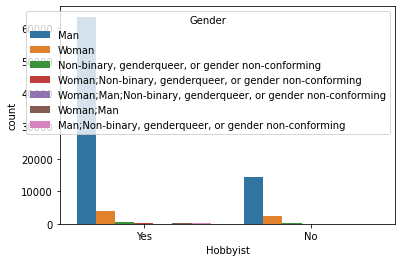

In [8]:
#e. What is the distribution of people who code as a hobby based on gender and continent?
sns.countplot(ss['Hobbyist'],hue=ss['Gender'])


      gender             carrier
0        Man                 NaN
1        Man                 NaN
2        Man  Slightly satisfied
3        Man      Very satisfied
4        Man   Very dissatisfied
...      ...                 ...
88878    Man                 NaN
88879    NaN                 NaN
88880    NaN                 NaN
88881    NaN                 NaN
88882    Man                 NaN

[88883 rows x 2 columns]


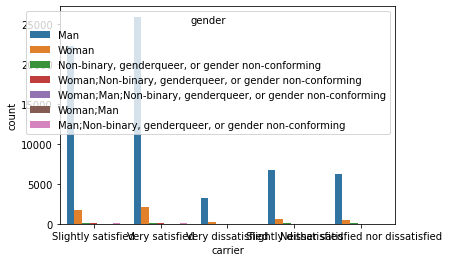

In [24]:
#Generate the report for job and career satisfaction of developer based on their gender and continent?
da={'gender':ss['Gender'],'carrier':ss['CareerSat']}
dfff=pd.DataFrame(da)
dfff.replace(to_replace=['Non-binary, genderqueer, or gender non-conforming','Woman;Non-binary, genderqueer or gender non-conforming','Woman;Man'] , value='Others')
print(dfff)
sns.countplot(x='carrier' ,hue='gender',data=dfff)